贝叶斯分类器起步于1950年代，基于贝叶斯决策理论，它把样本分到后验概率最大的那个类。

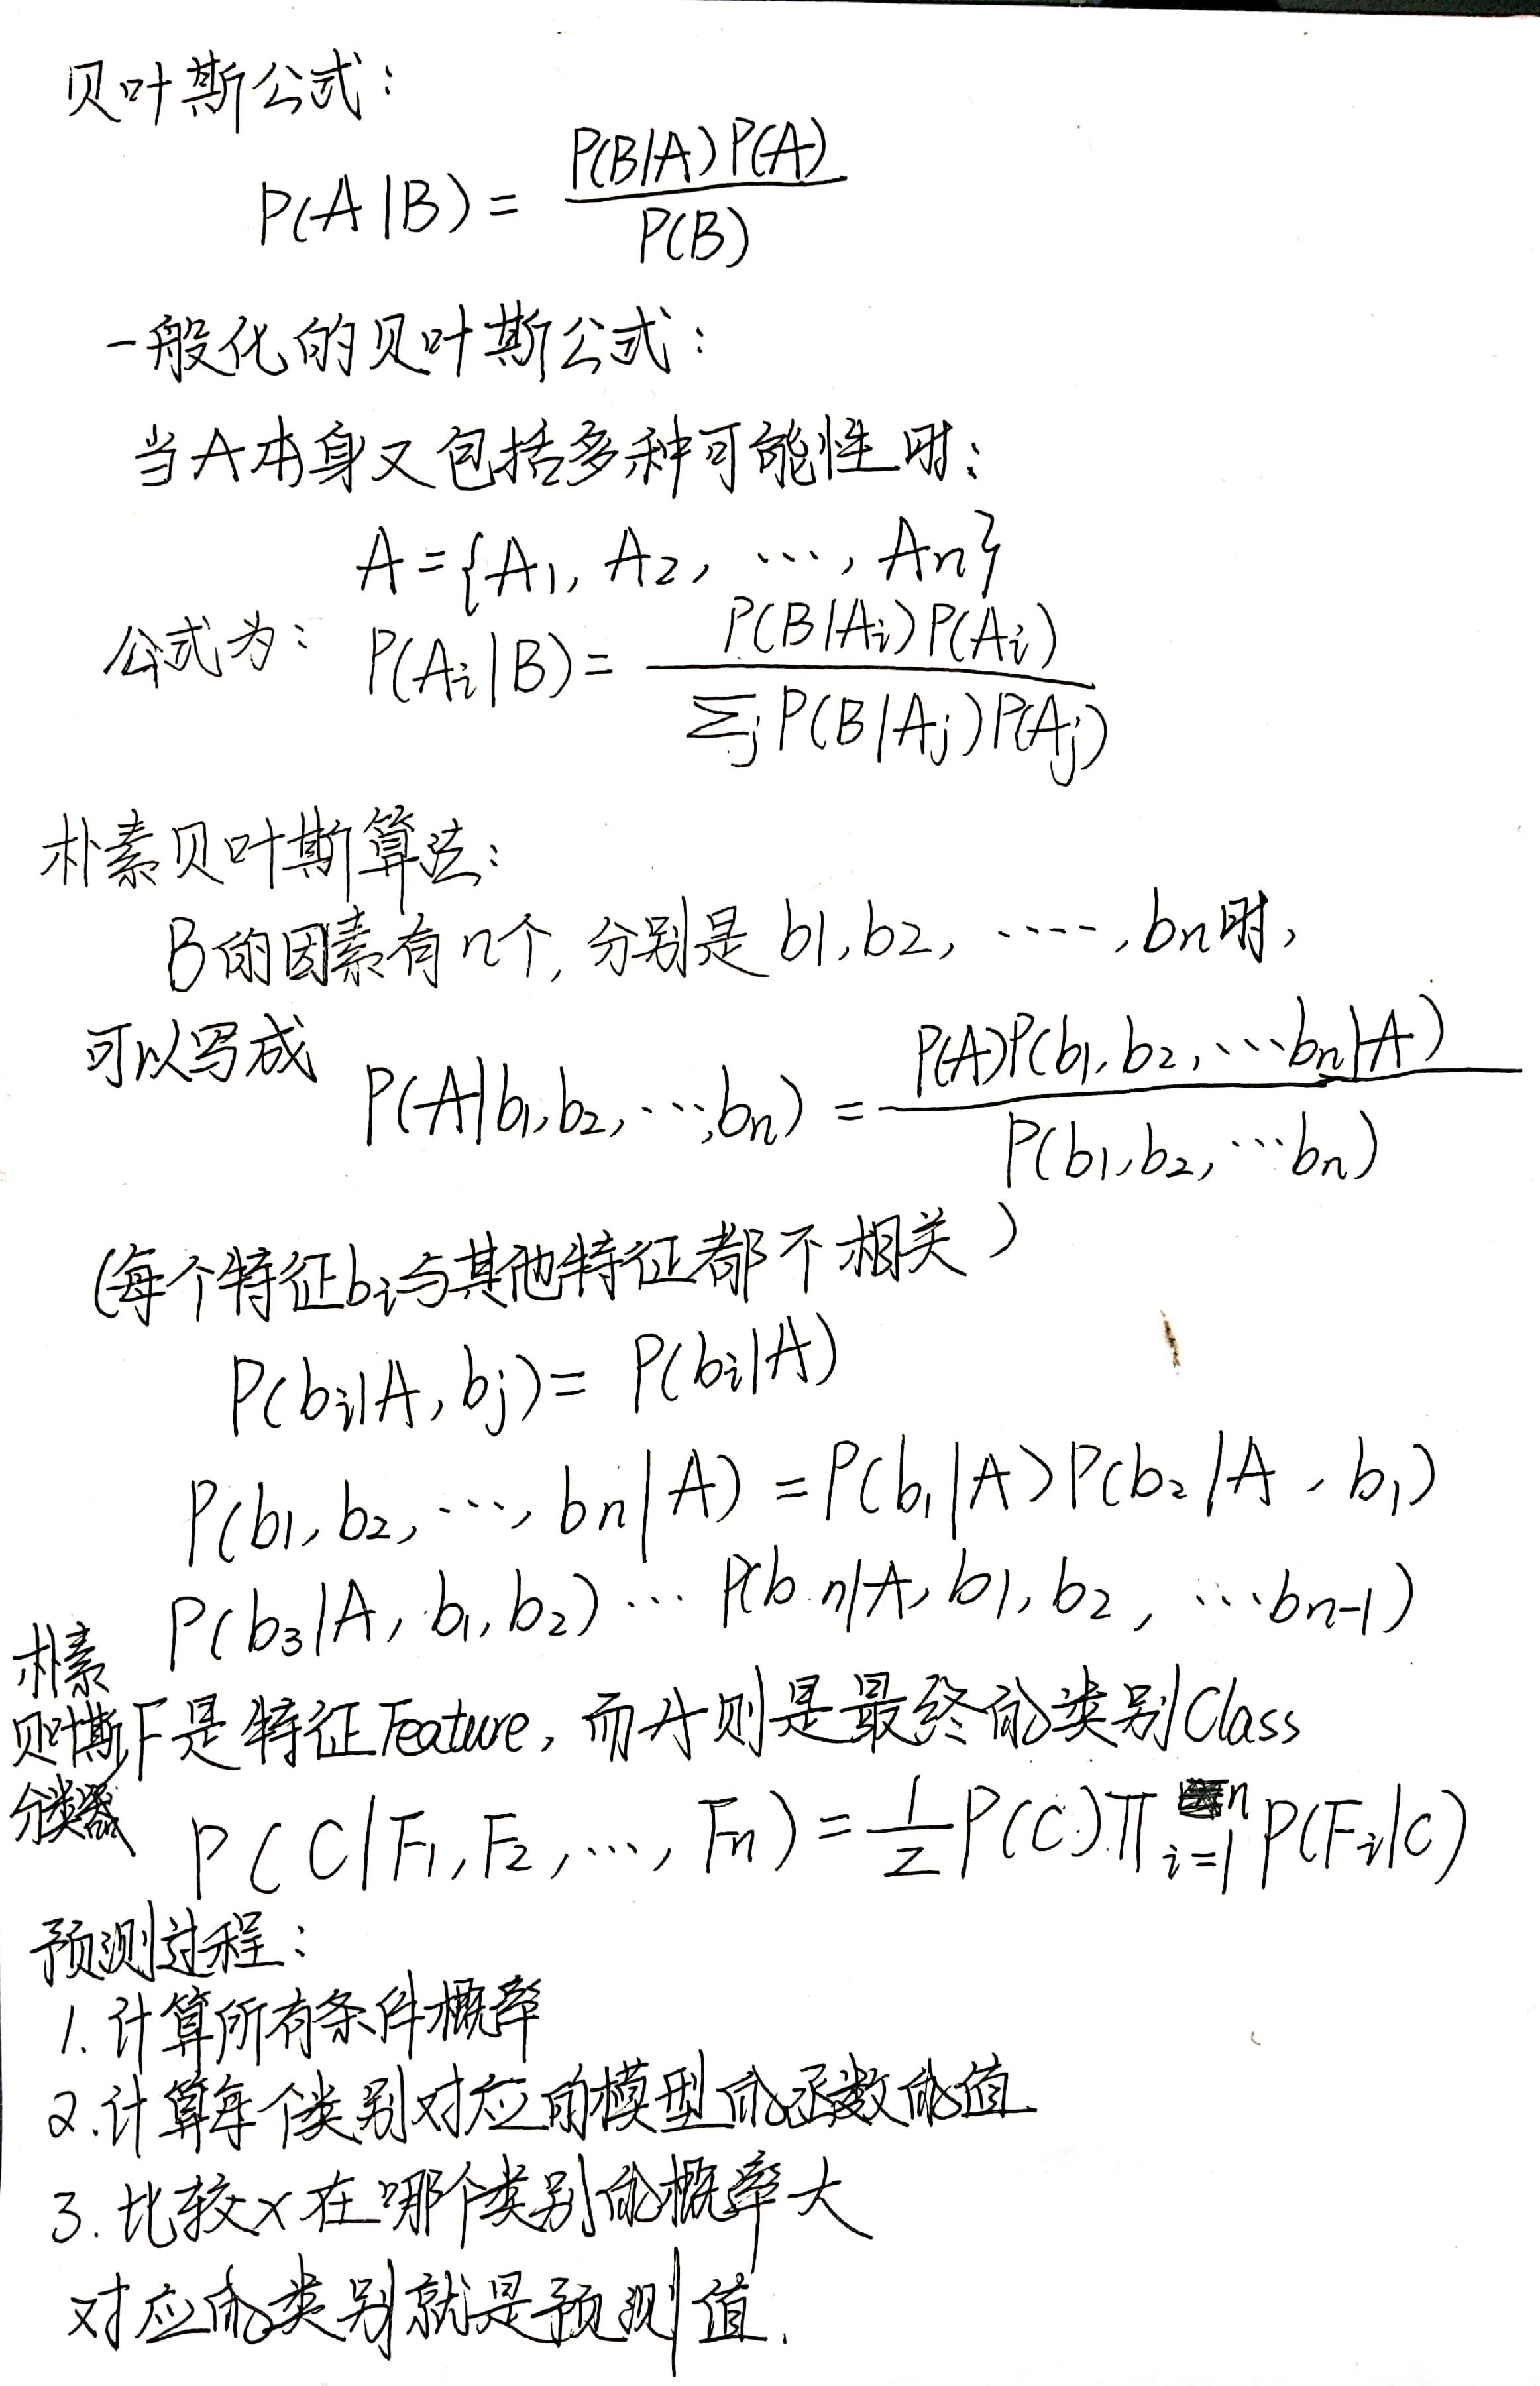

朴素贝叶斯代码实现

In [ ]:
def loadDataSet():
    postingList=[['my','dog','has','flea','problem','help','please'],
                 ['maybe','not','take','him','to','dog','park','stupid'],
                 ['my','dalmation','is','so','cute','I','love','him'],
                 ['stop','posting','ate','my','steak','how','to','stop','him'],
                 ['mr','licks','ate','my','steak','how','to','stop','him'],
                 ['quit','buying','worthless','dog','food','stupid']]
    classVec=[0,1,0,1,0,1]
    return postingList,classVec
#定义一个简单的文本数据集，由6个简单的文本以及对应的标签构成，
#1表示侮辱性文档，0表示正常文档


In [ ]:
def createVocabList(dataSet):
    vocabSet=set([])
    for document in dataSet:
        vocabSet=vocabSet|set(document)
    return list(vocabSet)


In [ ]:
def setOfWords2Vec(vocabList,inputSet):
    returnVec=[0]*len(vocabList)               #每个文档的大小与词典保持一致，此时returnVec是空表
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)]=1 #当前文档中有某个词条，则根据词典获取其位置并赋值1
    else:print "the word :%s is not in my vocabulary" %word
    return returnVec        
def bagOfWords2Vec(vocabList,inputSet):
    return Vec=[0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)]+=1 # 与词集模型的唯一区别就表现在这里
        else:print "the word :%s is not in my vocabulary" %word
    return returnVec
#### 文档向量化，这里是词袋模型，不知关心某个词条出现与否，还考虑该词条在本文档中的出现频率

In [ ]:
def trainNB(trainMatrix,trainCategory):                                        
    numTrainDocs=len(trainMatrix)     
    numWords=len(trainMatrix[0])        
    pAbusive=sum(trainCategory)/float(numTrainDocs) #统计侮辱性文档的总个数，然后除以总文档个数  
    #p0Num=zeros(numWords);p1Num=zeros(numWords)    # 把属于同一类的文本向量加起来
    #p0Denom=0.0;p1Denom=0.0
    p0Num=ones(numWords);p1Num=ones(numWords)
    p0Denom=2.0;p1Denom=2.0
    for i in range(numTrainDocs):
        if trainCategory[i]==1: 
            p1Num+=trainMatrix[i]#把属于同一类的文本向量相加，实质是统计某个词条在该类文本中出现频率
            p1Denom+=sum(trainMatrix[i]) #把侮辱性文档向量的所有元素加起来
        else:
            p0Num+=trainMatrix[i]
            p0Denom+=sum(trainMatrix[i]) 
     #p1Vec=p1Num/float(p1Denom) 
     #p0Vec=p0Num/float(p0Denom)
    p1Vec=log(p1Num/p1Denom) #统计词典中所有词条在侮辱性文档中出现的概率
    p0Vec=log(p0Num/p0Denom) #统计词典中所有词条在正常文档中出现的概率
    return pAbusive,p1Vec,p0Vec
#### 训练生成朴素贝叶斯模型，实质上相当于是计算P（x，y|Ci）P（Ci）的权重。
### 注意：被注释掉的代码代表不太好的初始化方式，在那种情况下某些词条的概率值可能会非常非常小，甚至约
###等于0，那么在不同词条的概率在相乘时结果就近似于0
def classifyNB(vec2classify,p0Vec,p1Vec,pClass1): 　# 参数1是测试文档向量，参数2和参数3是词条在各个
                                                  #类别中出现的概率，参数4是P（C1）
    p1=sum(vec2classify*p1Vec)+log(pClass1)　　　# 这里没有直接计算P（x，y|C1）P（C1），而是取其对数
                                                 #这样做也是防止概率之积太小，以至于为0
    p0=sum(vec2classify*p0Vec)+log(1.0-pClass1)　#取对数后虽然P（C1|x，y）和P(C0|x，y)的值变了，但是
                                                 #不影响它们的大小关系。
    if p1>p0:
        return 1
    else:
        return 0


In [ ]:
from numpy import zeros,array
from math import log

def loadDataSet():
#词条切分后的文档集合，列表每一行代表一个email 
    postingList=[['your','mobile','number','is','award','bonus','prize'],
                 ['new','car','and','house','for','my','parents'],
                 ['my','dalmation','is','so','cute','I','love','him'],  
                 ['today','voda','number','prize', 'receive','award'],
                 ['get','new','job','in','company','how','to','get','that'],
                 ['free','prize','buy','winner','receive','cash']]
    #由人工标注的每篇文档的类标签
    classVec=[1,0,0,1,0,1] #1-spam, 0-ham
    return postingList,classVec
postingList,classVec = loadDataSet()


#统计所有文档中出现的词条列表    
def createVocabList(dataSet): 
    vocabSet=set([])
    #遍历文档集合中的每一篇文档
    for document in dataSet: 
        vocabSet=vocabSet|set(document) 
    return list(vocabSet)
vocabSet = createVocabList(postingList)


#根据词条列表中的词条是否在文档中出现(出现1，未出现0)，将文档转化为词条向量    
def setOfWords2Vec(vocabSet,inputSet):
    #新建一个长度为vocabSet的列表，并且各维度元素初始化为0
    returnVec=[0]*len(vocabSet)
    #遍历文档中的每一个词条
    for word in inputSet:
        #如果词条在词条列表中出现
        if word in vocabSet:
            #通过列表获取当前word的索引(下标)
            #将词条向量中的对应下标的项由0改为1
            returnVec[vocabSet.index(word)]=1
        else: print('the word: %s is not in my vocabulary! '%'word')
    #返回inputet转化后的词条向量
    return returnVec
 
trainMatrix = [setOfWords2Vec(vocabSet,inputSet) for inputSet in postingList] 


#训练算法，从词向量计算概率p(w0|ci)...及p(ci)
#@trainMatrix：由每篇文档的词条向量组成的文档矩阵
#@trainCategory:每篇文档的类标签组成的向量
def trainNB0(trainMatrix,trainCategory):
    #获取文档矩阵中文档的数目
    numTrainDocs=len(trainMatrix)
    #获取词条向量的长度
    numWords=len(trainMatrix[0])
    #所有文档中属于类1所占的比例p(c=1)
    pAbusive=sum(trainCategory)/float(numTrainDocs)
    #创建一个长度为词条向量等长的列表
    p0Num=zeros(numWords) #ham
    p1Num=zeros(numWords) #spam
    p0Denom=0.0
    p1Denom=0.0
    #遍历每一篇文档的词条向量
    for i in range(numTrainDocs):
        #如果该词条向量对应的标签为1
        if trainCategory[i]==1:
            #统计所有类别为1的词条向量中各个词条出现的次数
            p1Num+=trainMatrix[i]
            #统计类别为1的词条向量中出现的所有词条的总数
            #即统计类1所有文档中出现单词的数目
            p1Denom+=sum(trainMatrix[i])
        else:
            #统计所有类别为0的词条向量中各个词条出现的次数
            p0Num+=trainMatrix[i]
            #统计类别为0的词条向量中出现的所有词条的总数
            #即统计类0所有文档中出现单词的数目
            p0Denom+=sum(trainMatrix[i])
    print(p1Num, p1Denom, p0Num,p0Denom )
    #利用NumPy数组计算p(wi|c1)
    p1Vect=p1Num/p1Denom  #为避免下溢出问题，需要改为log()
    #利用NumPy数组计算p(wi|c0)
    p0Vect=p0Num/p0Denom  #为避免下溢出问题，需要改为log()
    return p0Vect,p1Vect,pAbusive
 
p0Vect,p1Vect,pAbusive=  trainNB0(trainMatrix,classVec)


#朴素贝叶斯分类函数
#@vec2Classify:待测试分类的词条向量
#@p0Vec:类别0所有文档中各个词条出现的频数p(wi|c0)
#@p0Vec:类别1所有文档中各个词条出现的频数p(wi|c1)
#@pClass1:类别为1的文档占文档总数比例
def classifyNB(vec2Classify,p0Vec,p1Vec,pClass1):
    #根据朴素贝叶斯分类函数分别计算待分类文档属于类1和类0的概率
    p1=sum(vec2Classify*p1Vec)+log(pClass1)
    p0=sum(vec2Classify*p0Vec)+log(1.0-pClass1)
    if p1>p0:
        return 'spam'
    else:
        return 'not spam'



testEntry=['love','my','job']
thisDoc=array(setOfWords2Vec(vocabSet,testEntry))
print(testEntry,'classified as:',classifyNB(thisDoc,p0Vect,p1Vect,pAbusive))

1．朴素贝叶斯法是典型的生成学习方法。生成方法由训练数据学习联合概率分布
$P(X,Y)$，然后求得后验概率分布$P(Y|X)$。具体来说，利用训练数据学习$P(X|Y)$和$P(Y)$的估计，得到联合概率分布：

$$P(X,Y)＝P(Y)P(X|Y)$$

概率估计方法可以是极大似然估计或贝叶斯估计。

2．朴素贝叶斯法的基本假设是条件独立性，

$$\begin{aligned} P(X&=x | Y=c_{k} )=P\left(X^{(1)}=x^{(1)}, \cdots, X^{(n)}=x^{(n)} | Y=c_{k}\right) \\ &=\prod_{j=1}^{n} P\left(X^{(j)}=x^{(j)} | Y=c_{k}\right) \end{aligned}$$


这是一个较强的假设。由于这一假设，模型包含的条件概率的数量大为减少，朴素贝叶斯法的学习与预测大为简化。因而朴素贝叶斯法高效，且易于实现。其缺点是分类的性能不一定很高。

3．朴素贝叶斯法利用贝叶斯定理与学到的联合概率模型进行分类预测。

$$P(Y | X)=\frac{P(X, Y)}{P(X)}=\frac{P(Y) P(X | Y)}{\sum_{Y} P(Y) P(X | Y)}$$
 
将输入$x$分到后验概率最大的类$y$。

$$y=\arg \max _{c_{k}} P\left(Y=c_{k}\right) \prod_{j=1}^{n} P\left(X_{j}=x^{(j)} | Y=c_{k}\right)$$

后验概率最大等价于0-1损失函数时的期望风险最小化。


模型：

- 高斯模型
- 多项式模型
- 伯努利模型

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn,model_selection import train_test_split

from collections import Counter
import math

In [ ]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, :])
    # print(data)
    return data[:,:-1], data[:,-1]

In [ ]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_test[0], y_test[0]

参考：https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

## GaussianNB 高斯朴素贝叶斯

特征的可能性被假设为高斯

概率密度函数：
$$P(x_i | y_k)=\frac{1}{\sqrt{2\pi\sigma^2_{yk}}}exp(-\frac{(x_i-\mu_{yk})^2}{2\sigma^2_{yk}})$$

数学期望(mean)：$\mu$

方差：$\sigma^2=\frac{\sum(X-\mu)^2}{N}$

In [ ]:
class NaiveBayes:
    def __init__(self):
        self.model=None
    #数学期望
    def mean(X):
        return sum(X)/float(len(X))
    #标准差(方差)
    def stdv(self,X):
        avg=self.mean(X)
        return math.sqrt(sum([pow(x-avg,2)for x in X])/float(len(X)))
    #概率密度函数
    def gaussian_probability(self,x,mean,stdev):
        exponent=math.exp(-(math.pow(x-mean,2)/
                           (2*math.pow(stdev,2))))
        return (1/(math.sqrt(2*math.pi)*stdev))*exponent
    #处理X_train
    def summarize(self,train_data):
        summarizes=[(self.mean(i),self.stdev(i))for i in zip(*train_data)]
        return summaries
    #分类别求数学期望和标准差
    def fit(self,X,y):
        labels=list(set(y))
        data={label:[] for label in labels}
        for f,label in zip(X,y):
            data[label].append(f)
        self.model={
            label:self.summarize(value)
            for label ,value in data.items()
        }
        return 'gaussianNB train done!'
    #计算概率
    def calculate_probabilities(self,input_data):
        # summaries:{0.0: [(5.0, 0.37),(3.42, 0.40)], 1.0: [(5.8, 0.449),(2.7, 0.27)]}
        # input_data:[1.1, 2.2]
        probabilities = {}
        for label, value in self.model.items():
            probabilities[label] = 1
            for i in range(len(value)):
                mean, stdev = value[i]
                probabilities[label] *= self.gaussian_probability(
                    input_data[i], mean, stdev)
        return probabilities
    #类别
    def predict(self,X_test):
         # {0.0: 2.9680340789325763e-27, 1.0: 3.5749783019849535e-26}
        label = sorted(
            self.calculate_probabilities(X_test).items(),
            key=lambda x: x[-1])[-1][0]
        return label

    def score(self, X_test, y_test):
        right = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right += 1

        return right / float(len(X_test))


In [ ]:
model=NaiveBayes()

In [ ]:
mdoel.fit(X_train,y_train)

In [ ]:
print(model.predict([4.4,3.2,1.3,0.2]))

In [ ]:
model.score(X_test,y_test)

# scikit-learn实例

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf=GaussianNB()
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
clf.predict([[4.4,3.2,1.3,0.2]])

In [ ]:
from sklearn.naive_bayes import BernoulliNB,MultionmialNB

In [ ]:
# 伯努利模型和多项式模型